<a href="https://colab.research.google.com/github/Tech-Prep-Mentor/Food-Recommendation-Data/blob/main/interaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Group Project/RAW_interactions.csv")
data.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [ ]:
data.nunique()

user_id       226570
recipe_id     231637
date            6396
rating             6
review       1125282
dtype: int64

In [ ]:
data['rating'].value_counts()

rating
5    816364
4    187360
0     60847
3     40855
2     14123
1     12818
Name: count, dtype: int64

In [ ]:
data[data['rating'] == 0]

,user_id,recipe_id,date,rating,review
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
12,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...
23,681408,225241,2008-03-14,0,This is a very good recipe. We also want to c...
39,2002068522,29093,2018-03-26,0,i made it and it was amazing
56,980899,79222,2010-10-18,0,"I used half cream and half 1% milk, added anot..."
...,...,...,...,...,...
1132318,1197076,190261,2010-03-08,0,Delicious ! I tweeked the recipe a bit>>substi...
1132323,2405600,290157,2014-11-10,0,Just added this mix to a homemade beef &amp; s...
1132325,2000650711,290157,2017-04-10,0,Would this make a good hamburger patty seasoning?
1132361,102526,54493,2007-04-26,0,I am not going to rate this because I did have...


In [ ]:
# Function to classify sentiment based on ratings
def sentiment_from_rating(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    elif rating == 1 or rating == 2:
        return 'negative'

# Apply the classification function to the rating column
data1 = data[data['rating'] != 0]
data1['Sentiment'] = data['rating'].apply(sentiment_from_rating)

data1

<ipython-input-24-3b0007617e34>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Sentiment'] = data['rating'].apply(sentiment_from_rating)


,user_id,recipe_id,date,rating,review,Sentiment
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,positive
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",positive
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,positive
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,positive
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",positive
...,...,...,...,...,...,...
1132360,2002357020,82303,2018-12-05,5,Delicious quick thick chocolate sauce with ing...,positive
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...,positive
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...,positive
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...,positive


In [ ]:
data.shape

(1132367, 5)

In [ ]:
non_rated_reviews = data[(data['rating'] == 0)]
# Define a function to categorize sentiment based on polarity
def sentiment_category(non_rated_reviews):
    analysis = TextBlob(non_rated_reviews)
    if analysis.sentiment.polarity > 0.1:
        return 'positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to zero-rated reviews
non_rated_reviews['Sentiment'] = non_rated_reviews['review'].apply(sentiment_category)
non_rated_reviews


<ipython-input-26-458f3aed977e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_rated_reviews['Sentiment'] = non_rated_reviews['review'].apply(sentiment_category)


,user_id,recipe_id,date,rating,review,Sentiment
6,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo...",neutral
12,468945,134728,2008-02-20,0,Made my own buttermilk w/ vinegar and milk. U...,positive
23,681408,225241,2008-03-14,0,This is a very good recipe. We also want to c...,positive
39,2002068522,29093,2018-03-26,0,i made it and it was amazing,positive
56,980899,79222,2010-10-18,0,"I used half cream and half 1% milk, added anot...",neutral
...,...,...,...,...,...,...
1132318,1197076,190261,2010-03-08,0,Delicious ! I tweeked the recipe a bit>>substi...,positive
1132323,2405600,290157,2014-11-10,0,Just added this mix to a homemade beef &amp; s...,positive
1132325,2000650711,290157,2017-04-10,0,Would this make a good hamburger patty seasoning?,positive
1132361,102526,54493,2007-04-26,0,I am not going to rate this because I did have...,negative


In [ ]:
data = pd.concat([data1, non_rated_reviews], ignore_index=True)
data = merged_data[['user_id','recipe_id','rating','review','Sentiment']]
data

,user_id,recipe_id,rating,review,Sentiment
0,38094,40893,4,Great with a salad. Cooked on top of stove for...,positive
1,1293707,40893,5,"So simple, so delicious! Great for chilly fall...",positive
2,8937,44394,4,This worked very well and is EASY. I used not...,positive
3,126440,85009,5,I made the Mexican topping and took it to bunk...,positive
4,57222,85009,5,"Made the cheddar bacon topping, adding a sprin...",positive
...,...,...,...,...,...
1132362,1197076,190261,0,Delicious ! I tweeked the recipe a bit>>substi...,positive
1132363,2405600,290157,0,Just added this mix to a homemade beef &amp; s...,positive
1132364,2000650711,290157,0,Would this make a good hamburger patty seasoning?,positive
1132365,102526,54493,0,I am not going to rate this because I did have...,negative


In [ ]:
# Find the number of positive and negative reviews for each recipe_id
review_counts = merged_data.groupby(['recipe_id', 'Sentiment']).size().unstack()

# Find the recipe_id with the most positive and negative reviews
most_positive_recipe_id = review_counts['positive'].idxmax()
most_negative_recipe_id = review_counts['negative'].idxmax()

# Count the number of reviews for each user_id
user_review_counts = merged_data.groupby('user_id').size()

# Find the user_id with the most reviews
most_reviews_user_id = user_review_counts.idxmax()

# Print the results
print(f"Recipe ID {most_positive_recipe_id} received the most positive reviews, with {review_counts['positive'][most_positive_recipe_id]} reviews")
print(f"Recipe ID {most_negative_recipe_id} received the most negative reviews, with {review_counts['negative'][most_negative_recipe_id]} reviews")
print(f"User ID {most_reviews_user_id} gave the most reviews, with {user_review_counts[most_reviews_user_id]} reviews")


Recipe ID 2886 received the most positive reviews, with 1512.0 reviews
Recipe ID 132263 received the most negative reviews, with 123.0 reviews
User ID 424680 gave the most reviews, with 7671 reviews


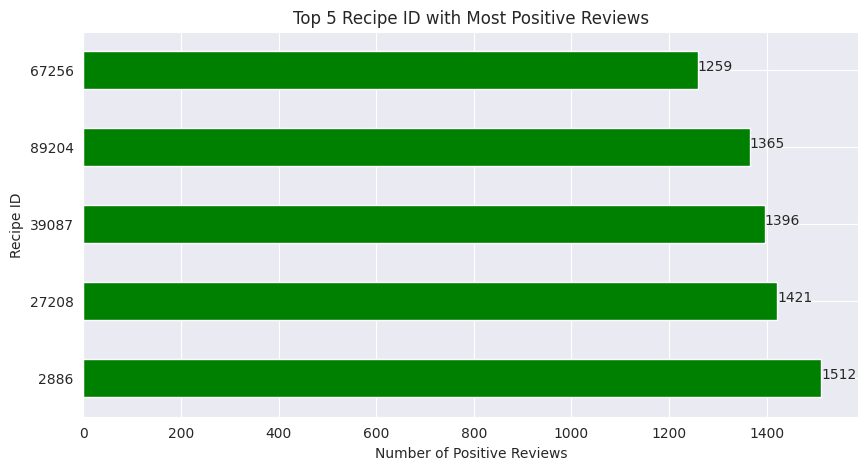

In [ ]:
# Get the top 5 recipe_id with the most positive reviews
top_5_positive = review_counts['positive'].sort_values(ascending=False).head(5)

# Create a horizontal bar chart
plt.figure(figsize=(10, 5))
top_5_positive.plot(kind='barh', color='green')

# Add the number of reviews to each bar
for i, value in enumerate(top_5_positive):
    plt.text(value, i, str(int(value)))

# Set the title and labels
plt.title('Top 5 Recipe ID with Most Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Recipe ID')

# Show the plot
plt.show()


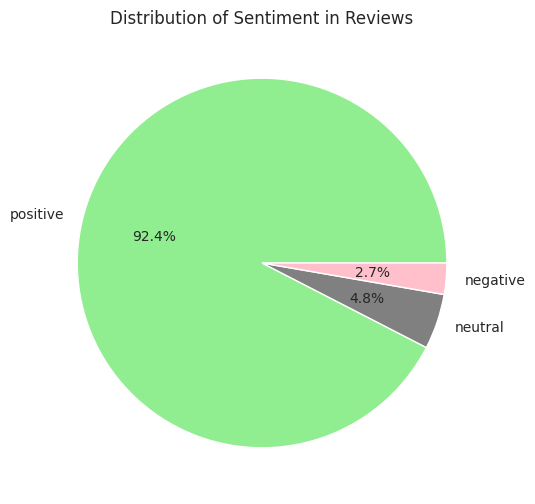

In [ ]:
# Calculate the number of reviews for each sentiment
sentiment_counts = merged_data['Sentiment'].value_counts()

# Define colors for each sentiment
colors = ['lightgreen', 'gray', 'pink']

# Create a donut chart
fig, ax = plt.subplots(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)

# Add a title
plt.title('Distribution of Sentiment in Reviews')

# Show the plot
plt.show()


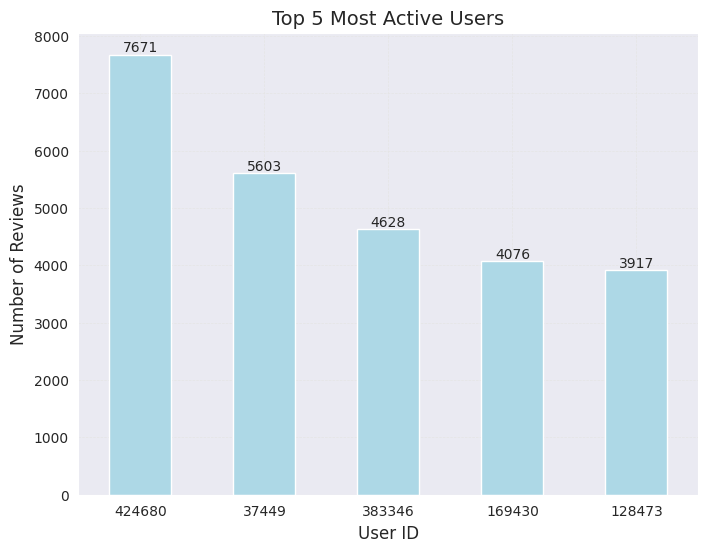

In [ ]:
# Find the top 5 most active users
top_5_users = user_review_counts.sort_values(ascending=False).head(5)

# Create a bar chart
plt.figure(figsize=(8, 6))
top_5_users.plot(kind='bar', color='lightblue')

# Add labels and title
plt.xlabel('User ID', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Top 5 Most Active Users', fontsize=14)

# Add grid lines
plt.grid(True, color='#e5e5e5', linestyle='--', linewidth=0.5)
plt.xticks(rotation=0)
# Add annotations
for i, value in enumerate(top_5_users.values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()
